In [19]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

def scrape_reviews(base_url, num_pages=10):
    # Initialize the Selenium WebDriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

    all_reviews = []

    for page_number in range(1, num_pages + 1):
        print(f"Scraping page {page_number}...")

        # Construct URL for the current page
        url = f"{base_url}/page/{page_number}/"
        driver.get(url)
        
        # Wait for the page to load completely
        time.sleep(5)

        # Get the page source
        html_content = driver.page_source

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract reviews
        for article in soup.find_all('article', itemprop='review'):
            try:
                date_published = article.find('meta', itemprop='datePublished')['content']
                rating_value = article.find('span', itemprop='ratingValue').text
                best_rating = article.find('span', itemprop='bestRating').text
                author_name = article.find('span', itemprop='name').text
                review_body = article.find('div', itemprop='reviewBody').text.strip()

                # Extract ratings for different categories
                ratings = {}
                for row in article.select('table.review-ratings tr'):
                    key = row.find('td', class_='review-rating-header').text.strip()
                    value = row.find('td', class_='review-value')
                    if value:
                        ratings[key] = value.text.strip()
                    else:
                        # Extract stars for categories with stars instead of text
                        stars = len(row.find_all('span', class_='star fill'))
                        ratings[key] = stars

                # Extract recommendation
                recommended = article.select_one('td.review-value.rating-no')
                recommended = 'No' if recommended else 'Yes'

                # Append data to the list
                all_reviews.append({
                    'Date Published': date_published,
                    'Rating': int(rating_value),
                    'Best Rating': int(best_rating),
                    'Author': author_name,
                    'Review': review_body,
                    **ratings,
                    'Recommended': recommended
                })
            except Exception as e:
                print(f"Error extracting review: {e}")
                continue

    # Close the WebDriver
    driver.quit()

    return all_reviews

# Base URL of the British Airways reviews page
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'

# Scrape reviews from all pages
reviews = scrape_reviews(base_url, num_pages=10)

# Convert the list to a DataFrame
df = pd.DataFrame(reviews)

# Save the DataFrame to a CSV file (optional)
df.to_csv('british_airways_reviews.csv', index=False)

# Display the DataFrame
print(df.head())

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
  Date Published  Rating  Best Rating           Author  \
0     2024-09-06       1           10          T Dawes   
1     2024-09-02       4           10     Amanda Edgar   
2     2024-09-01       2           10         S Morton   
3     2024-08-30       8           10          E Smyth   
4     2024-08-28       1           10  Lauren Boniface   

                                              Review          Aircraft  \
0  ✅ Trip Verified | Absolutely atrocious. LHR-OR...  Boeing 777-300ER   
1  ✅ Trip Verified | As someone who flies relentl...               NaN   
2  ✅ Trip Verified |   Flew with British Airways ...              A319   
3  ✅ Trip Verified |   Straightforward check in T...    Boeing 777-200   
4  Not Verified | I am beyond upset and disgusted...               NaN   

  Type Of Trave

In [20]:
df.head()

,Date Published,Rating,Best Rating,Author,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,2024-09-06,1,10,T Dawes,✅ Trip Verified | Absolutely atrocious. LHR-OR...,Boeing 777-300ER,Business,First Class,London Heathrow to Chicago,August 2024,1.0,1.0,1.0,1.0,1.0,1.0,1,No
1,2024-09-02,4,10,Amanda Edgar,✅ Trip Verified | As someone who flies relentl...,NaN,Couple Leisure,Business Class,London to Crete,September 2024,2.0,1.0,1.0,1.0,2.0,3.0,2,No
2,2024-09-01,2,10,S Morton,✅ Trip Verified | Flew with British Airways ...,A319,Business,Business Class,Berlin to London,August 2024,3.0,1.0,3.0,NaN,1.0,NaN,1,No
3,2024-08-30,8,10,E Smyth,✅ Trip Verified | Straightforward check in T...,Boeing 777-200,Family Leisure,Business Class,London to Toronto,August 2024,4.0,4.0,4.0,5.0,4.0,5.0,4,Yes
4,2024-08-28,1,10,Lauren Boniface,Not Verified | I am beyond upset and disgusted...,NaN,Solo Leisure,Economy Class,London to Denver,August 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,No


In [21]:
df.fillna(0, inplace= True)

In [22]:
df.head()

,Date Published,Rating,Best Rating,Author,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,2024-09-06,1,10,T Dawes,✅ Trip Verified | Absolutely atrocious. LHR-OR...,Boeing 777-300ER,Business,First Class,London Heathrow to Chicago,August 2024,1.0,1.0,1.0,1.0,1.0,1.0,1,No
1,2024-09-02,4,10,Amanda Edgar,✅ Trip Verified | As someone who flies relentl...,0,Couple Leisure,Business Class,London to Crete,September 2024,2.0,1.0,1.0,1.0,2.0,3.0,2,No
2,2024-09-01,2,10,S Morton,✅ Trip Verified | Flew with British Airways ...,A319,Business,Business Class,Berlin to London,August 2024,3.0,1.0,3.0,0.0,1.0,0.0,1,No
3,2024-08-30,8,10,E Smyth,✅ Trip Verified | Straightforward check in T...,Boeing 777-200,Family Leisure,Business Class,London to Toronto,August 2024,4.0,4.0,4.0,5.0,4.0,5.0,4,Yes
4,2024-08-28,1,10,Lauren Boniface,Not Verified | I am beyond upset and disgusted...,0,Solo Leisure,Economy Class,London to Denver,August 2024,1.0,1.0,0.0,0.0,1.0,0.0,1,No


Top 10 words for topic #0:
['did', 'got', 'airways', 'service', 'british', 'check', 'crew', 'time', 'ba', 'flight']
Top 10 words for topic #1:
['sent', 'service', 'verified', 'hours', 'luggage', 'ba', 'change', 'customer', 'flight', 'told']
Top 10 words for topic #2:
['time', 'food', 'seat', 'business', 'seats', 'service', 'class', 'crew', 'ba', 'flight']
Top 10 words for topic #3:
['don', 'later', 'days', 'fly', 'home', 'plane', 'british', 'airways', 'terrible', 'flight']
Top 10 words for topic #4:
['day', 'hours', 'class', 'business', 'luggage', 'told', 'service', 'customer', 'ba', 'flight']


/home/thundertrojan/jupyter_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


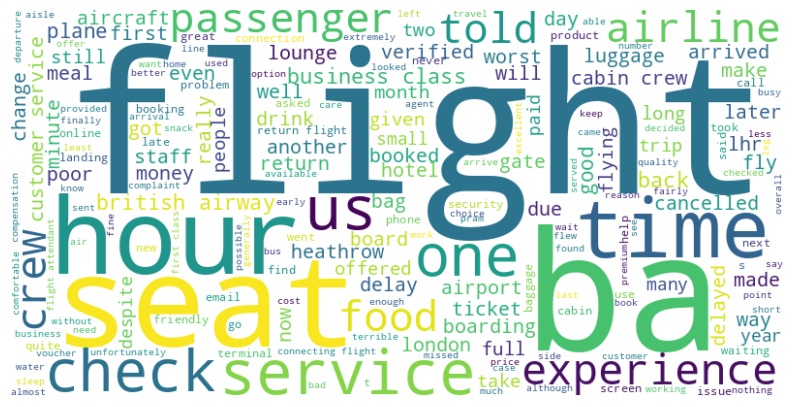

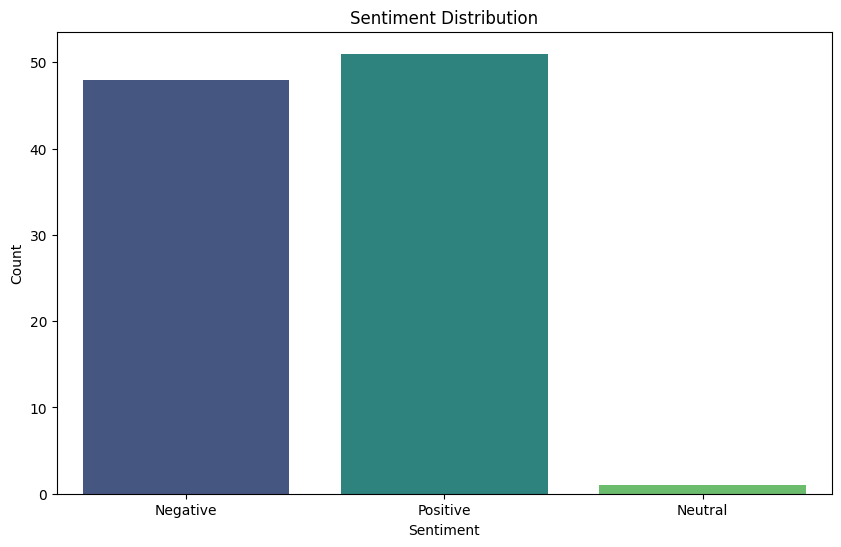

<Figure size 640x480 with 0 Axes>

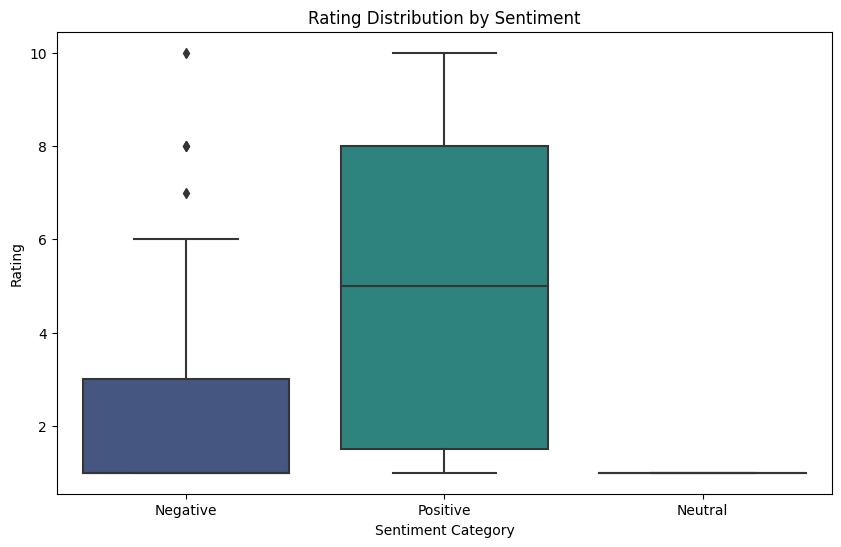

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

# Load the dataset
df = pd.read_csv('british_airways_reviews.csv')

# Step 1: Data Cleaning
def clean_text(text):
    # Remove any unwanted characters
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'✅ Trip Verified |', '', text)  # Remove specific phrases
    text = text.lower()  # Convert to lowercase
    return text.strip()

df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Step 2: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Categorize sentiment into Positive, Neutral, Negative
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Step 3: Topic Modeling
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
X = vectorizer.fit_transform(df['Cleaned_Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{index}:")
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])

# Step 4: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Review']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Distribution Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment_Category', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Save sentiment distribution plot
plt.savefig('sentiment_distribution.png')

# Step 5: Analyze by Rating
# Distribution of ratings based on sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment_Category', y='Rating', palette='viridis')
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Rating')
plt.show()

# Save sentiment vs. rating plot
plt.savefig('rating_sentiment_distribution.png')